purpose: to look at MAGMA S2G mapping for rats

# set-up

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.multitest
import statsmodels.api as sm 
import pylab as py 
import statsmodels.api as sm
from scipy.stats import pearsonr
import seaborn as sb

In [2]:
os.chdir('/tscc/projects/ps-palmer/brittany/rare_common_alcohol/rare_common_alcohol_comparison/notebooks/')

In [3]:
from rca_functions import manhattan

In [4]:
os.chdir('/tscc/projects/ps-palmer/brittany/SUD_cross_species/')

In [5]:
save_fig=True

In [6]:
IBM=['#648FFF','#785EF0','#DC267F','#FE6100','#FFB000']
colour_dict={
    'ext':IBM[1],
    'ext_alt':IBM[0],
    'loco':IBM[4],
    'loco_alt':IBM[3],
    'shared':IBM[2],
    'other':'#CCCCCC',
    'smkinit_pc1':IBM[1],
    'smkinit_pc1_alt':IBM[0],
    'cigday_pc1':IBM[2],
    'cigday_pc1_alt':'#930741'
}

In [7]:
cutoff=0

# import files

## SNP level results

In [9]:
nicsa_gwas_dir='/tscc/projects/ps-palmer/brittany/SUD_cross_species/nicsa_gwas_pc1/results/gwas/mlma_concat/'
snp_dict={
    'cigday_pc1':pd.read_csv(nicsa_gwas_dir+'regressedlr_cigday_pc1.mlma',sep='\t'),
    'smkinit_pc1':pd.read_csv(nicsa_gwas_dir+'regressedlr_smkinit_pc1.mlma',sep='\t'),
    'loco':pd.read_csv('loco_meta/regressedlr_combined_locomotor.mlma', sep='\t'),
    'ext_munged':pd.read_csv('ext_sumstat_2019/FINAL.EXT_COMMON_FACTOR.EXTERNALIZING.20191014.extended.sumstats.gz',compression='gzip',sep='\t'),
    'ext':pd.read_csv('ext_sumstat_2019/FINAL.EXT_COMMON_FACTOR.EXTERNALIZING.20191014.PREPARED.wFREQ.A1.txt.gz',compression='gzip',delim_whitespace=True,)
}

In [10]:
snp_dict['ext']=pd.read_csv('ext_sumstat_2019/FINAL.EXT_COMMON_FACTOR.EXTERNALIZING.20191014.PREPARED.wFREQ.A1.txt.gz',compression='gzip',delim_whitespace=True,)

## gene level results

In [11]:
#locomotor- all window sizes
win=[0,1,5,10,25,50]
loco={}
for x in win:    
    loco[x]=pd.read_csv('magma/loco_meta_win'+str(x)+'.genes.out', delim_whitespace=True,index_col=None,skiprows=1)

In [12]:
magma_dict={
    'cigday_pc1':pd.read_csv('magma/cigday_pc1_nicsa_geno.genes.out',delim_whitespace=True,index_col=None,skiprows=1),
    'smkinit_pc1':pd.read_csv('magma/smkinit_pc1_nicsa_geno.genes.out',delim_whitespace=True,index_col=None,skiprows=1),
    'loco':loco[10],
    'ext':pd.read_csv('magma/seed_genes/ext_orig_annot.tsv',sep='\t'),
    'ext_munged':pd.read_csv('magma/seed_genes/ext_munged_annot.tsv',sep='\t')
}

In [13]:
for k in magma_dict.keys():
    magma_dict[k]['Q']=statsmodels.stats.multitest.fdrcorrection(magma_dict[k]['P'],alpha=0.05,method='indep',is_sorted=False)[1]

# define functions

In [14]:
def qqplot_gwas(pvals,c,savefig=False,filename='qqplot'):

    # Calculate theoretical p-values
    n = len(pvals)
    expected = -np.log10((np.arange(1, n + 1) / (n + 1)))
    
    # Sort the observed p-values
    observed = -np.log10(np.sort(pvals))

    # Create the Q-Q plot
    plt.figure(figsize=(4, 4))
    plt.plot(expected, observed, 'o', label='Observed p-values',color=c)
    plt.plot([0, max(expected)], [0, max(expected)], 'k-', label='Expected (null)')
    plt.xlabel('-log10(p)')
    plt.ylabel('-log10(p)')

    if(savefig):
       plt.savefig('figures/'+filename+'.png',dpi=600,bbox_inches='tight') 
    plt.show()

# Example usage
# qqplot_gwas(pvals, qtltable, col2use, tnum, d, save=True, path='/your/path/')


In [15]:
def corr_plt(x,y,stat='p'):
    if stat=='p':
        x=-np.log10(x)
        y=-np.log10(y)
    corr='%s' % float('%.2g' % pearsonr(x,y)[0])
    fig=plt.figure(figsize=(4,4))
    fig=plt.plot([0, 10], [0, 10], color='black', linestyle='--')
    fig=plt.scatter(x,y,color=colour_dict['loco'])
    fig=plt.title(str(w)+' kb window vs '+str(w2)+' kb window, corr='+str(corr))
    if stat=='p':
        fig=plt.xlabel('-log10(p) ('+ str(w)+ ' kb win)')
        fig=plt.ylabel('-log10(p) ('+ str(w2)+ ' kb win)')
    elif stat=='z':
        fig=plt.xlabel('ZSTAT ('+ str(w)+ ' kb win)')
        fig=plt.ylabel('ZSTAT ('+ str(w2)+ ' kb win)')
    return(corr)

# plot GWAS pvalue comparison

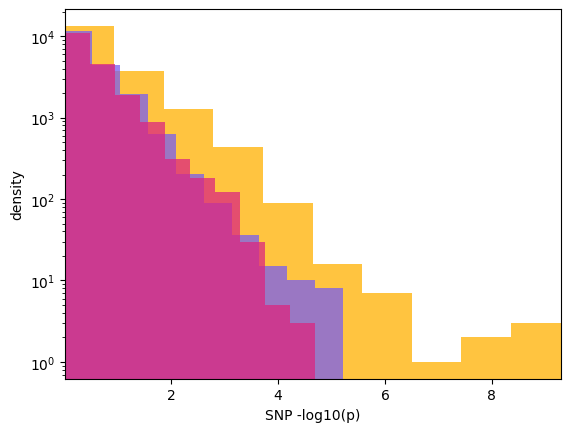

In [67]:
plt.hist(-np.log10(magma_dict['loco'].P), bins=None, histtype='stepfilled',density=False, rwidth=0.75,color=colour_dict['loco'], label='smkinit',alpha=0.75)
plt.hist(-np.log10(magma_dict['smkinit_pc1'].P), bins=None, histtype='stepfilled',density=False, rwidth=0.75,color=colour_dict['smkinit'], label='smkinit',alpha=0.75)
plt.hist(-np.log10(magma_dict['cigday_pc1'].P), bins=None,histtype='stepfilled',density=False, rwidth=0.75,color=colour_dict['cigday'], label='cigday',alpha=0.75)
plt.yscale('log')
fig=plt.xlabel('SNP -log10(p)')
fig=plt.ylabel('density')
plt.margins(x=0)

#plt.legend()

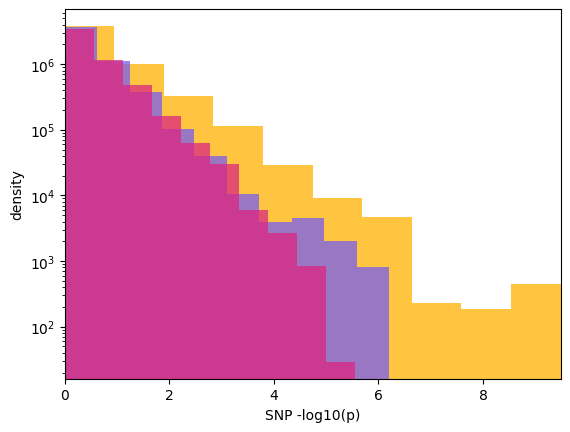

In [69]:
plt.hist(-np.log10(snp_dict['loco'].p), bins=None, histtype='stepfilled',density=False, rwidth=0.75,color=colour_dict['loco'], label='smkinit',alpha=0.75)
plt.hist(-np.log10(snp_dict['smkinit_pc1'].p), bins=None, histtype='stepfilled',density=False, rwidth=0.75,color=colour_dict['smkinit'], label='smkinit',alpha=0.75)
plt.hist(-np.log10(snp_dict['cigday_pc1'].p), bins=None,histtype='stepfilled',density=False, rwidth=0.75,color=colour_dict['cigday'], label='cigday',alpha=0.75)
plt.yscale('log')
fig=plt.xlabel('SNP -log10(p)')
fig=plt.ylabel('density')
plt.margins(x=0)

#plt.legend()

# manhattan and QQ plot

### cigarettes per day

In [249]:
k='cigday_pc1'

#### SNP

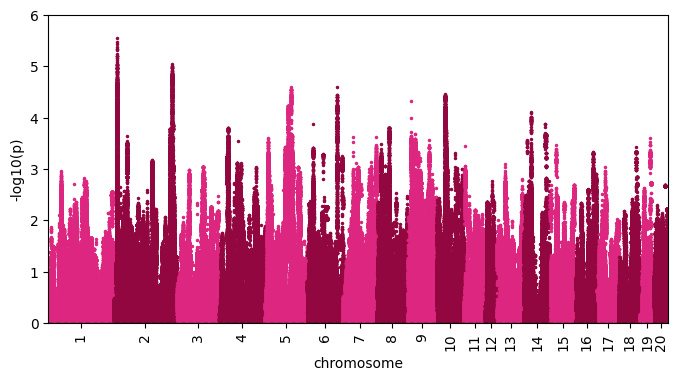

In [250]:
fig=plt.figure(figsize=(8,4))
#fig, ax=plt.subplots(figsize=(10,4))
manhattan(pval=snp_dict[k].p,pos=snp_dict[k].bp,chr=snp_dict[k].Chr,label='',
                    cut=cutoff,lines=[cutoff],lines_colors=['black'], colors=[colour_dict[k], colour_dict[(k+'_alt')]],
                    lines_widths = [1], lines_styles = ["--"], markersize=3, plot_grid_lines=False)
fig=plt.title('')
fig=plt.ylabel('-log10(p)')
plt.margins(x=0)
#commented out- use to turn into miami plot
#plt.gca().invert_yaxis()
#plt.tick_params(axis='x',labeltop=True, top=True, bottom=False, labelbottom=False)
fig=plt.xticks(rotation='vertical')
if save_fig:
    plt.savefig('figures/manhattan_cut'+str(cutoff)+'_'+k+'_SNP'+'.png',dpi=600,bbox_inches='tight')

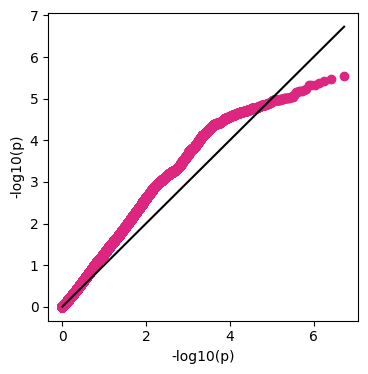

In [251]:
qqplot_gwas(snp_dict[k].p,colour_dict[k],save_fig,('qqplot_cut'+str(cutoff)+'_'+k+'_SNP'))

#### magma

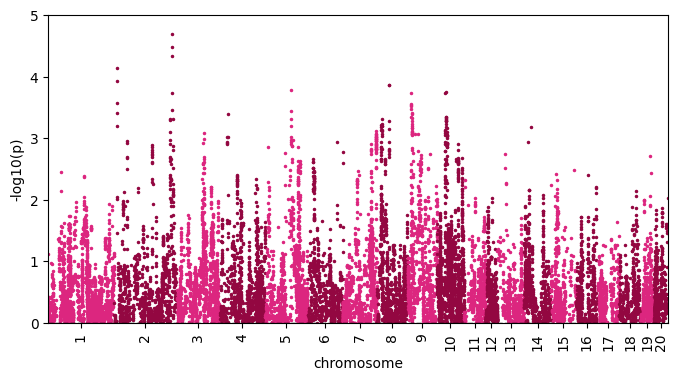

In [252]:
fig=plt.figure(figsize=(8,4))
#fig, ax=plt.subplots(figsize=(10,4))
manhattan(pval=magma_dict[k]['P'],pos=magma_dict[k]['START'],chr=magma_dict[k]['CHR'],label='',
                    cut=0,lines=[cutoff],lines_colors=['black'], colors=[colour_dict[k], colour_dict[k+'_alt']],
                    lines_widths = [1], lines_styles = ["--"], markersize=3, plot_grid_lines=False)
fig=plt.title('')
fig=plt.ylabel('-log10(p)')
plt.margins(x=0)
#commented out- use to turn into miami plot
#plt.gca().invert_yaxis()
#plt.tick_params(axis='x',labeltop=True, top=True, bottom=False, labelbottom=False)
fig=plt.xticks(rotation='vertical')
if save_fig:
    plt.savefig('figures/manhattan_cut'+str(cutoff)+'_'+k+'_magma'+'.png',dpi=600,bbox_inches='tight')

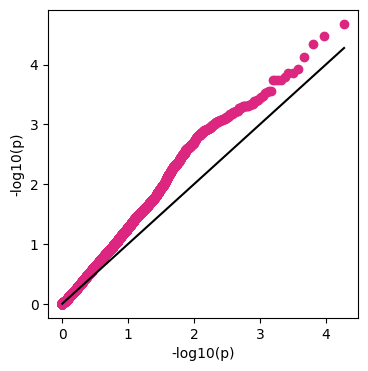

In [253]:
qqplot_gwas(magma_dict[k].P,colour_dict[k],save_fig,('qqplot_cut'+str(cutoff)+'_'+k+'_magma'))

### SMKINIT

In [254]:
k='smkinit_pc1'

#### SNP

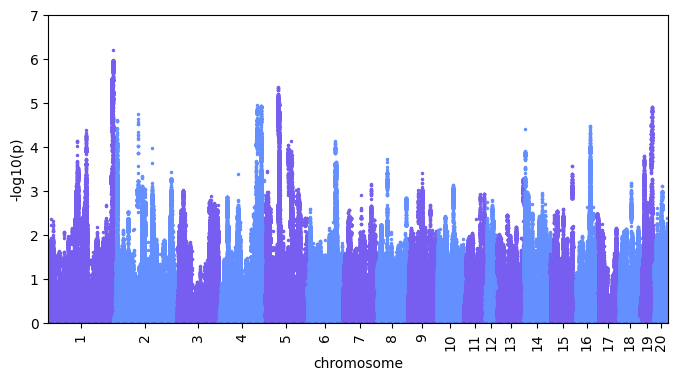

In [255]:
fig=plt.figure(figsize=(8,4))
#fig, ax=plt.subplots(figsize=(10,4))
manhattan(pval=snp_dict[k].p,pos=snp_dict[k].bp,chr=snp_dict[k].Chr,label='',
                    cut=cutoff,lines=[cutoff],lines_colors=['black'], colors=[colour_dict[k], colour_dict[(k+'_alt')]],
                    lines_widths = [1], lines_styles = ["--"], markersize=3, plot_grid_lines=False)
fig=plt.title('')
fig=plt.ylabel('-log10(p)')
plt.margins(x=0)
#commented out- use to turn into miami plot
#plt.gca().invert_yaxis()
#plt.tick_params(axis='x',labeltop=True, top=True, bottom=False, labelbottom=False)
fig=plt.xticks(rotation='vertical')
if save_fig:
    plt.savefig('figures/manhattan_cut'+str(cutoff)+'_'+k+'_SNP'+'.png',dpi=600,bbox_inches='tight')

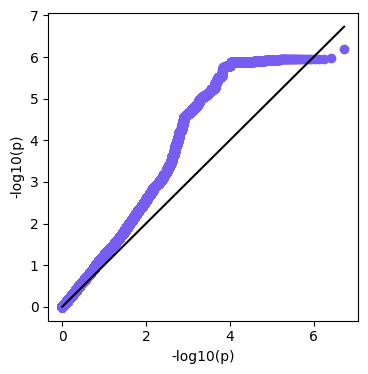

In [256]:
qqplot_gwas(snp_dict[k].p,colour_dict[k],save_fig,('qqplot_cut'+str(cutoff)+'_'+k+'_SNP'))

#### magma

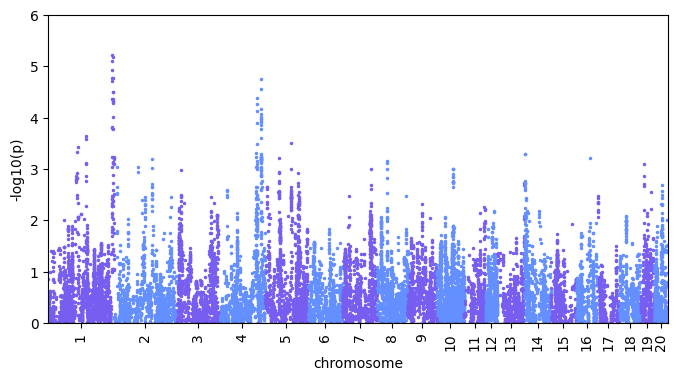

In [257]:
fig=plt.figure(figsize=(8,4))
#fig, ax=plt.subplots(figsize=(10,4))
manhattan(pval=magma_dict[k]['P'],pos=magma_dict[k]['START'],chr=magma_dict[k]['CHR'],label='',
                    cut=0,lines=[cutoff],lines_colors=['black'], colors=[colour_dict[k], colour_dict[k+'_alt']],
                    lines_widths = [1], lines_styles = ["--"], markersize=3, plot_grid_lines=False)
fig=plt.title('')
fig=plt.ylabel('-log10(p)')
plt.margins(x=0)
#commented out- use to turn into miami plot
#plt.gca().invert_yaxis()
#plt.tick_params(axis='x',labeltop=True, top=True, bottom=False, labelbottom=False)
fig=plt.xticks(rotation='vertical')
if save_fig:
    plt.savefig('figures/manhattan_cut'+str(cutoff)+'_'+k+'_SNP'+'.png',dpi=600,bbox_inches='tight')

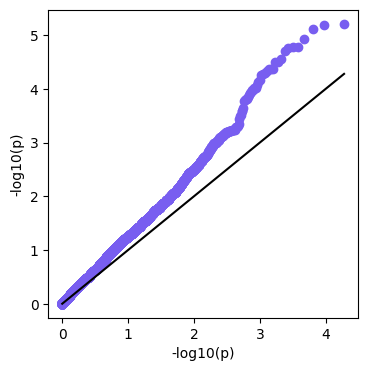

In [258]:
qqplot_gwas(magma_dict[k].P,colour_dict[k],save_fig,('qqplot_cut'+str(cutoff)+'_'+k+'_magma'))

### locomotor activity

In [20]:
k='loco'

#### SNP

In [17]:
rat_snp_strin=5.58
rat_snp_len=5.38

In [21]:
save_fig=False

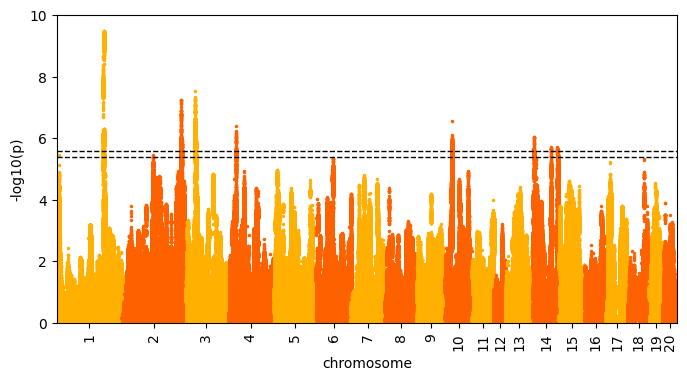

In [22]:
fig=plt.figure(figsize=(8,4))
#fig, ax=plt.subplots(figsize=(10,4))
manhattan(pval=snp_dict[k].p,pos=snp_dict[k].bp,chr=snp_dict[k].Chr,label='',
                    cut=cutoff,lines=[rat_snp_strin,rat_snp_len],lines_colors=['black','black'], colors=[colour_dict[k], colour_dict[(k+'_alt')]],
                    lines_widths = [1,1], lines_styles = ["--","--"], markersize=3, plot_grid_lines=False)
fig=plt.title('')
fig=plt.ylabel('-log10(p)')
plt.margins(x=0)
#commented out- use to turn into miami plot
#plt.gca().invert_yaxis()
#plt.tick_params(axis='x',labeltop=True, top=True, bottom=False, labelbottom=False)
fig=plt.xticks(rotation='vertical')
if save_fig:
    plt.savefig('figures/manhattan_cut'+str(cutoff)+'_'+k+'_SNP'+'.png',dpi=600,bbox_inches='tight')

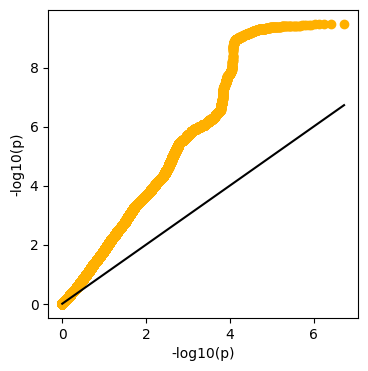

In [261]:
qqplot_gwas(snp_dict[k].p,colour_dict[k],save_fig,('qqplot_cut'+str(cutoff)+'_'+k+'_SNP'))

#### magma

In [32]:
magma_len=-np.log10(max(magma_dict[k][magma_dict[k]['Q']<0.05]['P']))
magma_strin=-np.log10(0.05/len(magma_dict[k]))

In [30]:
magma_strin

2.6389402016150313e-06

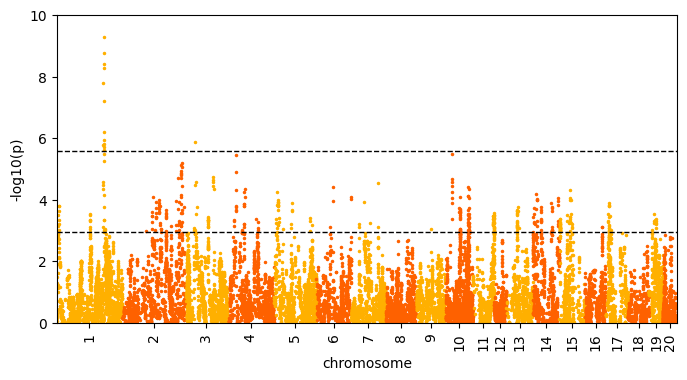

In [33]:
fig=plt.figure(figsize=(8,4))
#fig, ax=plt.subplots(figsize=(10,4))
manhattan(pval=magma_dict[k]['P'],pos=magma_dict[k]['START'],chr=magma_dict[k]['CHR'],label='',
                    cut=0,lines=[magma_len, magma_strin],lines_colors=['black','black'], colors=[colour_dict[k], colour_dict[k+'_alt']],
                    lines_widths = [1,1], lines_styles = ["--","--"], markersize=3, plot_grid_lines=False)
fig=plt.title('')
fig=plt.ylabel('-log10(p)')
plt.margins(x=0)
#commented out- use to turn into miami plot
#plt.gca().invert_yaxis()
#plt.tick_params(axis='x',labeltop=True, top=True, bottom=False, labelbottom=False)
fig=plt.xticks(rotation='vertical')
if save_fig:
    plt.savefig('figures/manhattan_cut'+str(cutoff)+'_'+k+'_magma'+'.png',dpi=600,bbox_inches='tight')

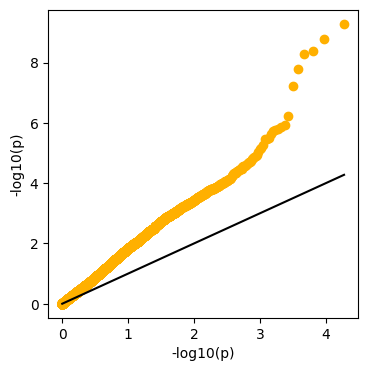

In [263]:
qqplot_gwas(magma_dict[k].P,colour_dict[k],save_fig,('qqplot_cut'+str(cutoff)+'_'+k+'_magma'))

### externalizing (2019)

In [15]:
k='ext'

In [18]:
snp_dict[k].head()

,SNP,CHR,BP,CHRBP,A1,A2,FREQ.A1,BETA.A1,SE,Z,P,N
0,rs1000000,12,126890980,12:126890980,G,A,0.776342,0.004646,0.001379,3.369192,0.000754,1492085
1,rs10000000,4,40088896,4:40088896,A,T,0.941352,0.004165,0.002461,1.692317,0.090585,1492085
2,rs10000003,4,57561647,4:57561647,A,G,0.297217,0.000721,0.001256,0.573997,0.565970,1492085
3,rs10000010,4,21618674,4:21618674,T,C,0.509940,0.000681,0.001148,0.593359,0.552941,1492085
4,rs10000011,4,138223055,4:138223055,C,T,0.968191,-0.004513,0.003262,-1.383708,0.166448,1492085


#### SNP

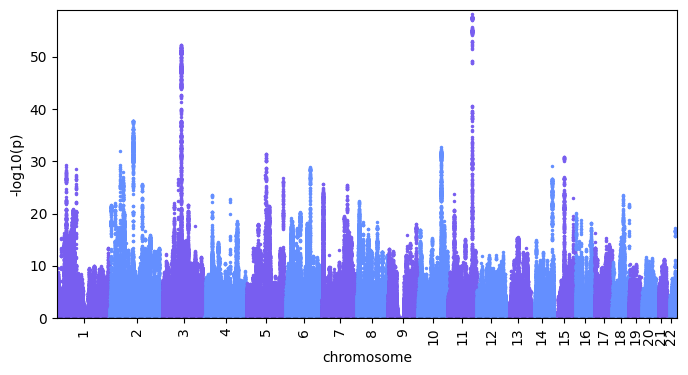

In [19]:
fig=plt.figure(figsize=(8,4))
#fig, ax=plt.subplots(figsize=(10,4))
manhattan(pval=snp_dict[k].P,pos=snp_dict[k].BP,chr=snp_dict[k].CHR,label='',
                    cut=cutoff,lines=[cutoff],lines_colors=['black'], colors=[colour_dict[k], colour_dict[(k+'_alt')]],
                    lines_widths = [1], lines_styles = ["--"], markersize=3, plot_grid_lines=False)
fig=plt.title('')
fig=plt.ylabel('-log10(p)')
plt.margins(x=0)
#commented out- use to turn into miami plot
#plt.gca().invert_yaxis()
#plt.tick_params(axis='x',labeltop=True, top=True, bottom=False, labelbottom=False)
fig=plt.xticks(rotation='vertical')
if save_fig:
    plt.savefig('figures/manhattan_cut'+str(cutoff)+'_'+k+'_SNP'+'.png',dpi=600,bbox_inches='tight')

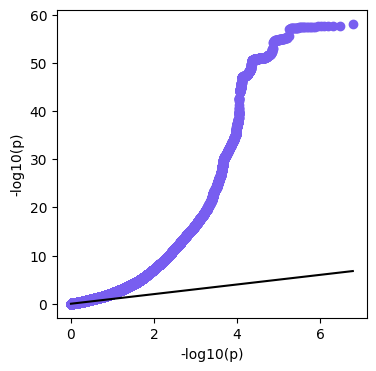

In [20]:
qqplot_gwas(snp_dict[k].P,colour_dict[k],save_fig,('qqplot_cut'+str(cutoff)+'_'+k+'_SNP'))

#### magma

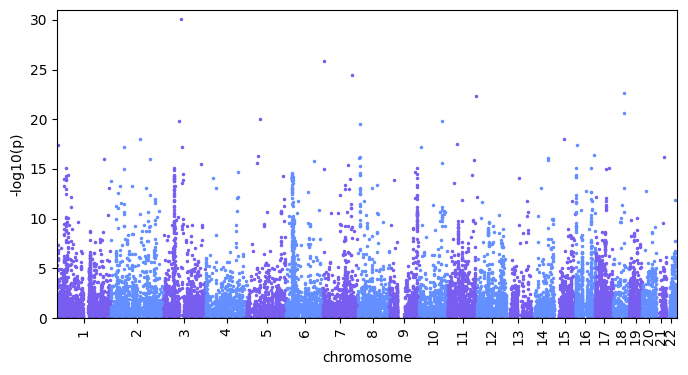

In [23]:
fig=plt.figure(figsize=(8,4))
#fig, ax=plt.subplots(figsize=(10,4))
manhattan(pval=magma_dict[k]['P'],pos=magma_dict[k]['START'],chr=magma_dict[k]['CHR'],label='',
                    cut=0,lines=[cutoff],lines_colors=['black'], colors=[colour_dict[k], colour_dict[k+'_alt']],
                    lines_widths = [1], lines_styles = ["--"], markersize=3, plot_grid_lines=False)
fig=plt.title('')
fig=plt.ylabel('-log10(p)')
plt.margins(x=0)
#commented out- use to turn into miami plot
#plt.gca().invert_yaxis()
#plt.tick_params(axis='x',labeltop=True, top=True, bottom=False, labelbottom=False)
fig=plt.xticks(rotation='vertical')
if save_fig:
    plt.savefig('figures/manhattan_cut'+str(cutoff)+'_'+k+'_magma'+'.png',dpi=600,bbox_inches='tight')

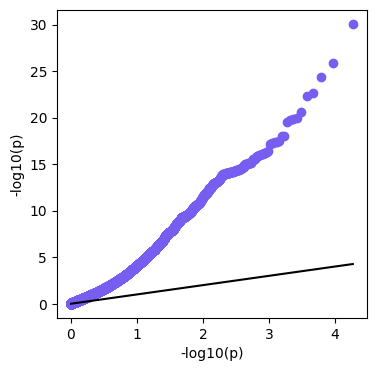

In [24]:
qqplot_gwas(magma_dict[k].P,colour_dict[k],save_fig,('qqplot_cut'+str(cutoff)+'_'+k+'_magma'))

# run correlation for MAGMA- compare window size

## generate heat map of correlation

### fillna

/tmp/ipykernel_962736/1578706763.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'P_x'} in the result is deprecated and will raise a MergeError in a future version.
  t=loco[0][['GENE','P']].merge(
/tmp/ipykernel_962736/1578706763.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'P_x'} in the result is deprecated and will raise a MergeError in a future version.
  t=loco[0][['GENE','P']].merge(


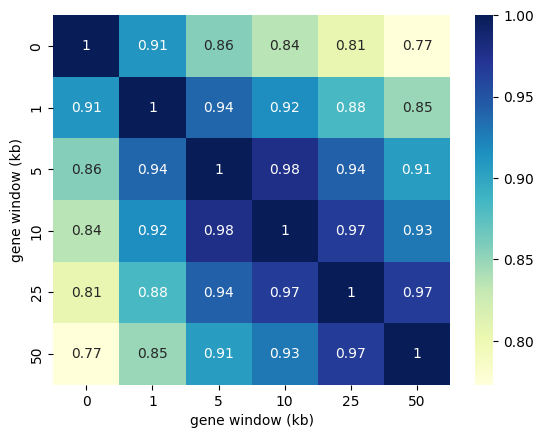

In [243]:
t=loco[0][['GENE','P']].merge(
    loco[1][['GENE','P']],on='GENE',how='outer').merge(
    loco[5][['GENE','P']],on='GENE',how='outer').merge(
    loco[10][['GENE','P']],on='GENE',how='outer').merge(
    loco[25][['GENE','P']],on='GENE',how='outer').merge(
    loco[50][['GENE','P']],on='GENE',how='outer').fillna(1)
t.columns=['GENE']+list(loco.keys())
matrix = t.corr(numeric_only=True)
dataplot = sb.heatmap(matrix, cmap="YlGnBu", annot=True) 
dataplot=plt.xlabel('gene window (kb)')
dataplot=plt.ylabel('gene window (kb)')
plt.savefig("figures/loco_magma_window_corr_pval_fillna.svg")

In [231]:
matrix['sum']=matrix.sum(axis=1)
matrix

,0,1,5,10,25,50,sum
0,1.000000,0.990996,0.981054,0.974536,0.960764,0.944939,17.556867
1,0.990996,1.000000,0.990386,0.983638,0.970080,0.954448,17.668642
5,0.981054,0.990386,1.000000,0.995327,0.982361,0.966747,17.747624
10,0.974536,0.983638,0.995327,1.000000,0.989640,0.974398,17.752619
25,0.960764,0.970080,0.982361,0.989640,1.000000,0.988937,17.675348
50,0.944939,0.954448,0.966747,0.974398,0.988937,1.000000,17.488408


### dropna

/tmp/ipykernel_962736/827880129.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'P_x'} in the result is deprecated and will raise a MergeError in a future version.
  t=loco[0][['GENE','P']].merge(
/tmp/ipykernel_962736/827880129.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'P_x'} in the result is deprecated and will raise a MergeError in a future version.
  t=loco[0][['GENE','P']].merge(


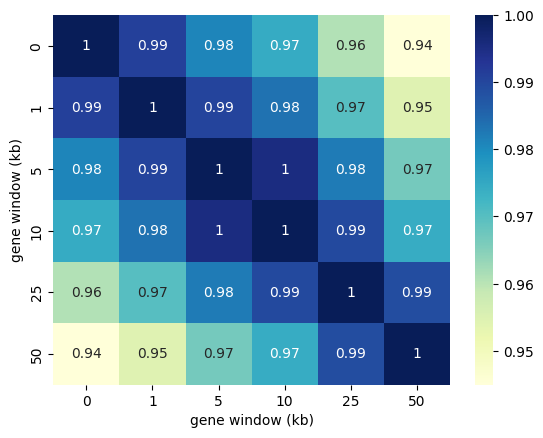

In [242]:
t=loco[0][['GENE','P']].merge(
    loco[1][['GENE','P']],on='GENE',how='outer').merge(
    loco[5][['GENE','P']],on='GENE',how='outer').merge(
    loco[10][['GENE','P']],on='GENE',how='outer').merge(
    loco[25][['GENE','P']],on='GENE',how='outer').merge(
    loco[50][['GENE','P']],on='GENE',how='outer').dropna()
t.columns=['GENE']+list(loco.keys())
matrix = t.corr(numeric_only=True)
dataplot = sb.heatmap(matrix, cmap="YlGnBu", annot=True)
dataplot=plt.xlabel('gene window (kb)')
dataplot=plt.ylabel('gene window (kb)')
plt.savefig("figures/loco_magma_window_corr_pval_dropna.svg")

In [230]:
matrix['sum']=matrix.sum(axis=1)
matrix

,0,1,5,10,25,50,sum
0,1.000000,0.990996,0.981054,0.974536,0.960764,0.944939,11.704578
1,0.990996,1.000000,0.990386,0.983638,0.970080,0.954448,11.779095
5,0.981054,0.990386,1.000000,0.995327,0.982361,0.966747,11.831749
10,0.974536,0.983638,0.995327,1.000000,0.989640,0.974398,11.835079
25,0.960764,0.970080,0.982361,0.989640,1.000000,0.988937,11.783565
50,0.944939,0.954448,0.966747,0.974398,0.988937,1.000000,11.658939


## plot correlation plots

### PVal- fillna

/tmp/ipykernel_962736/2992066994.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=(4,4))


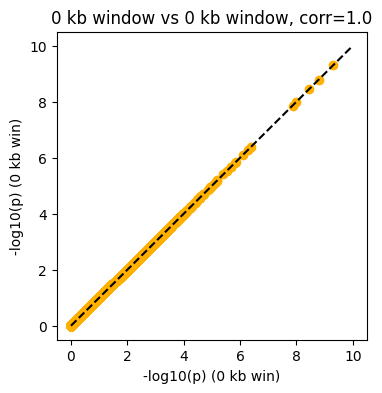

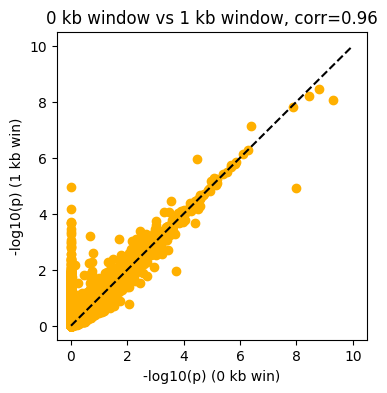

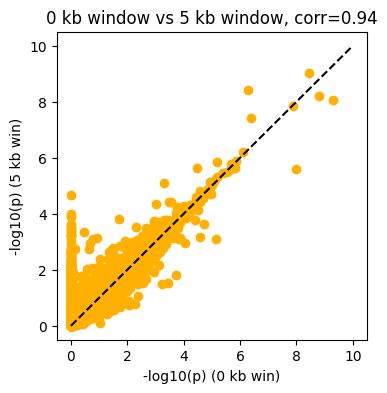

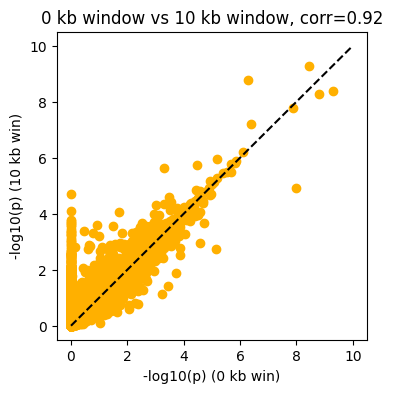

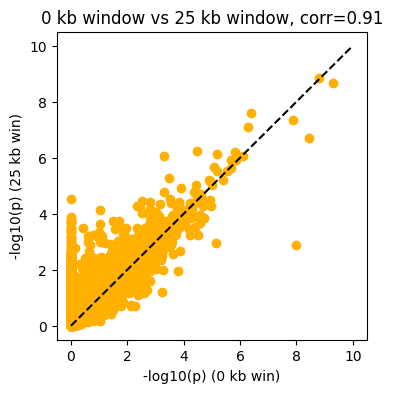

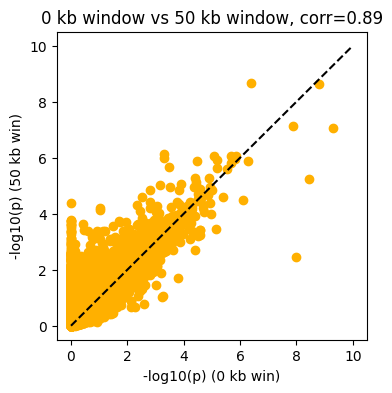

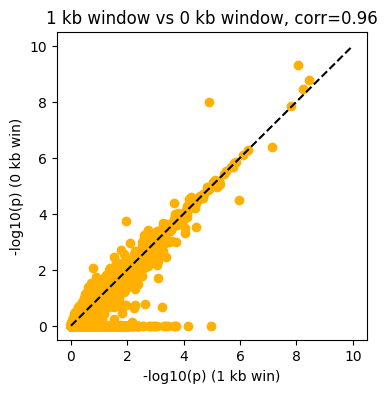

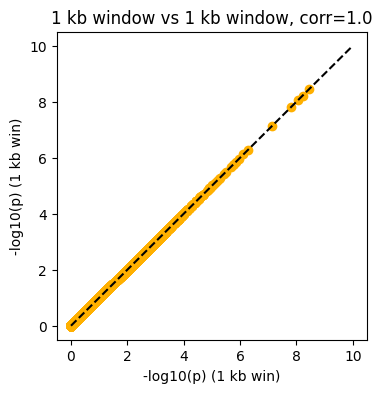

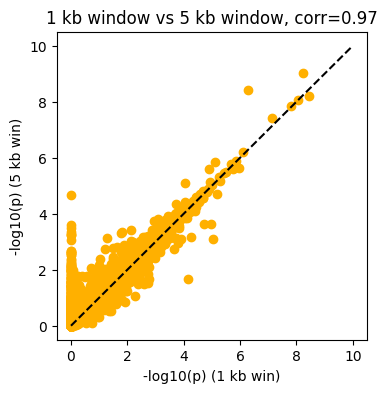

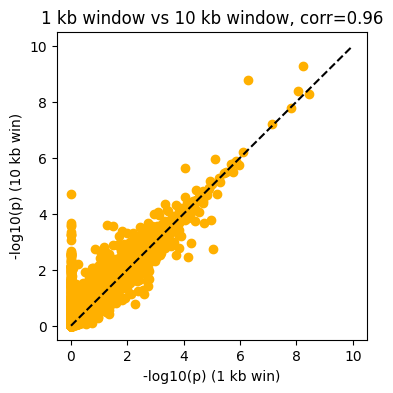

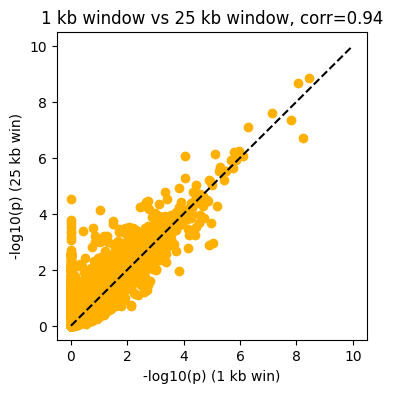

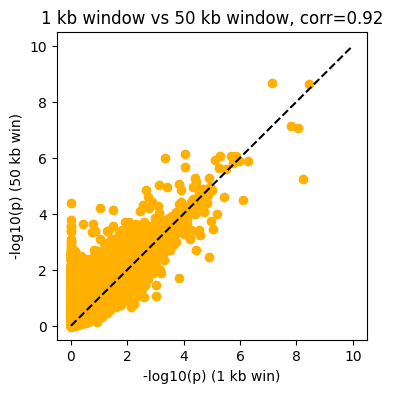

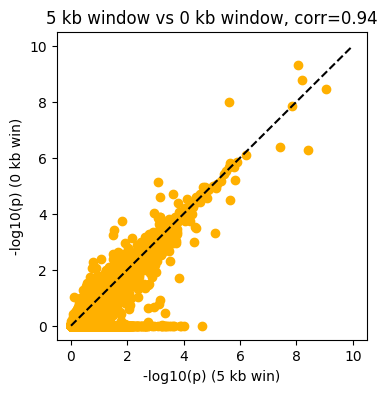

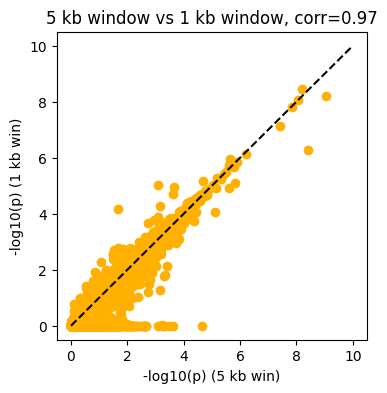

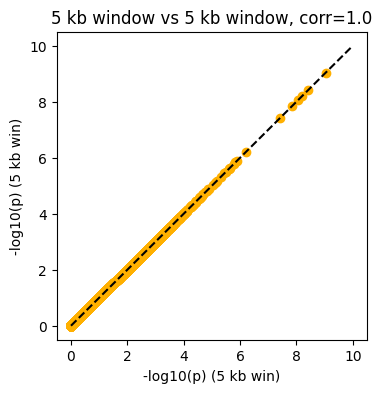

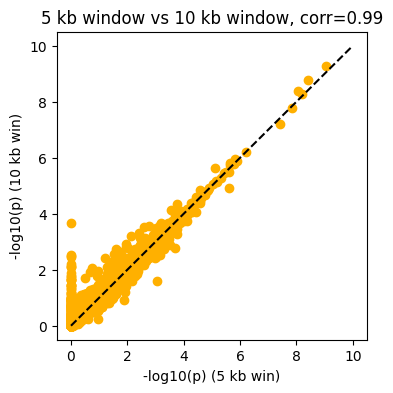

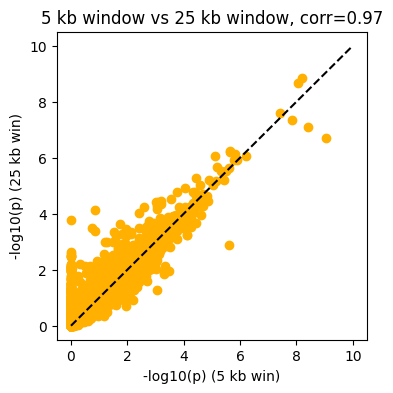

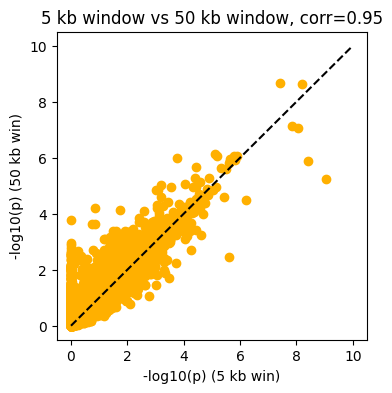

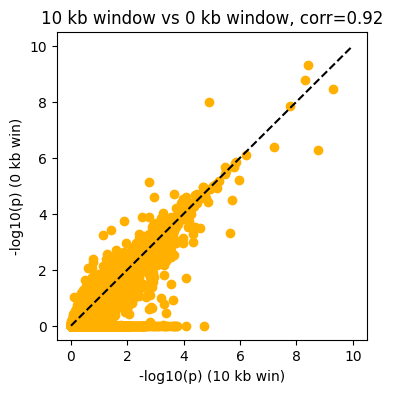

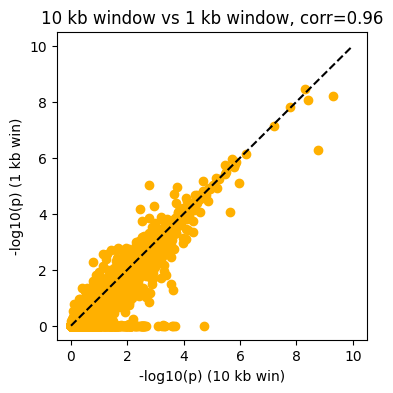

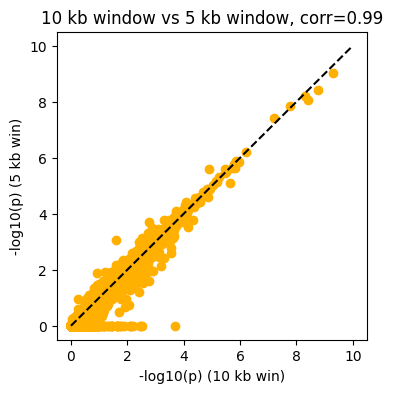

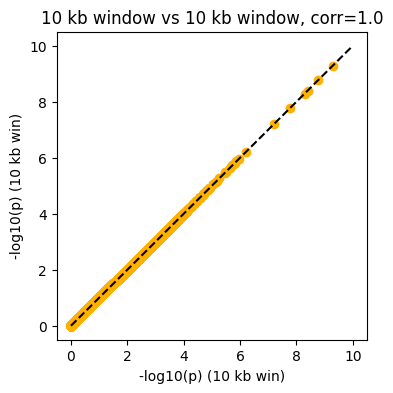

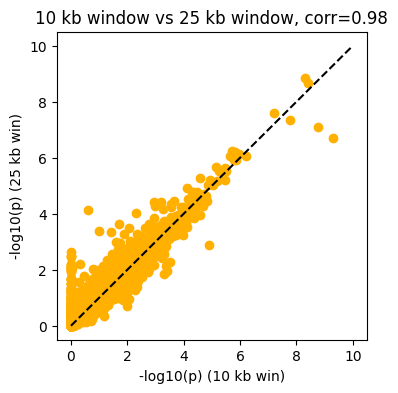

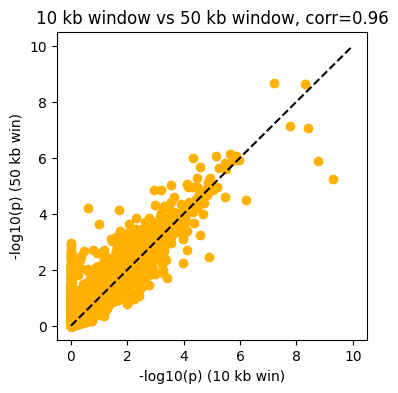

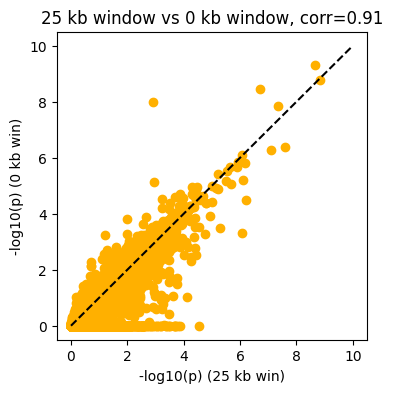

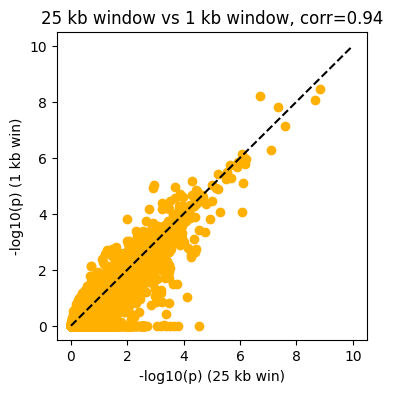

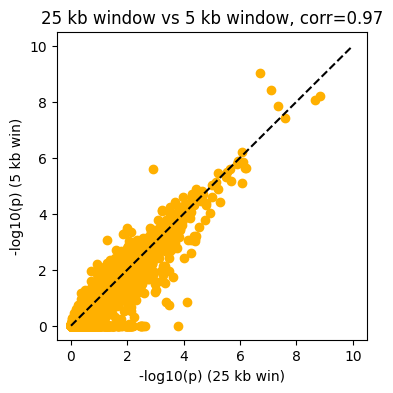

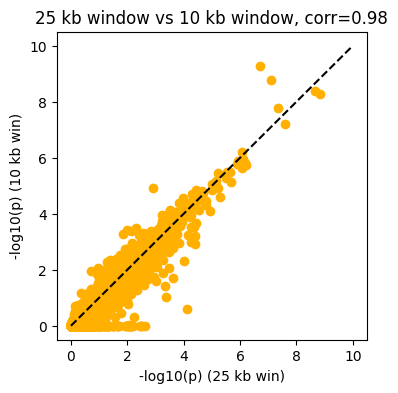

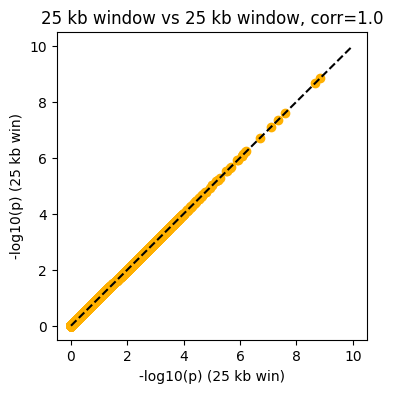

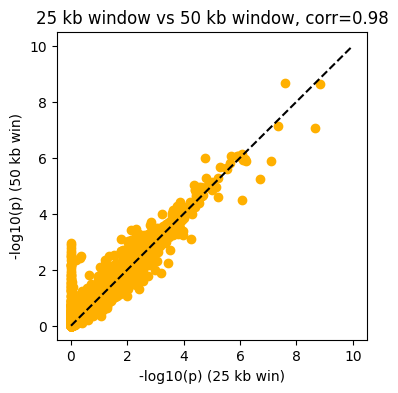

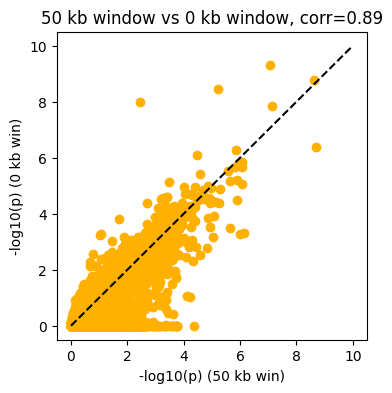

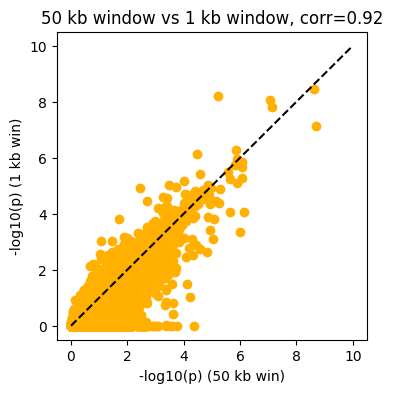

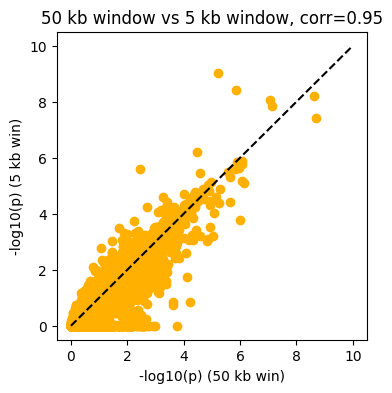

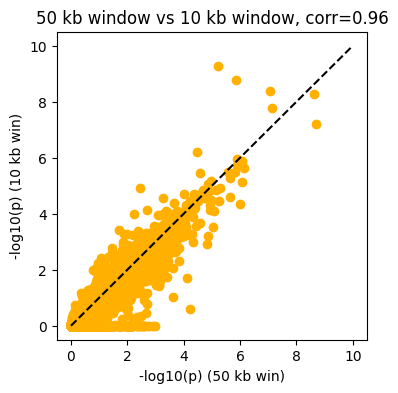

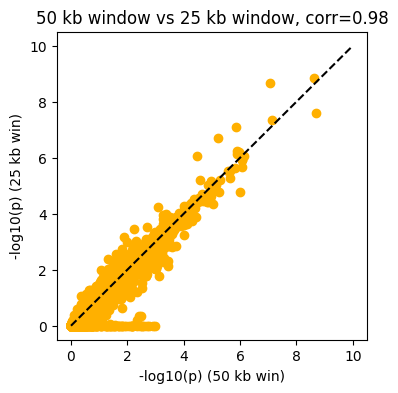

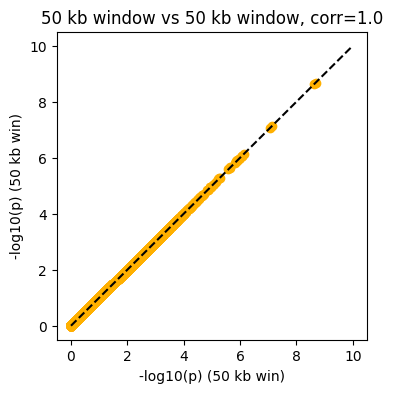

In [179]:
for w in list(loco.keys()):
    for w2 in list(loco.keys()):
        t=loco[w][['GENE','P','ZSTAT']].merge(loco[w2][['GENE','P','ZSTAT']],on='GENE',how='outer').fillna(1)
        corr_plt(t['P_x'],t['P_y'],'p')
        del(t)

### PVal- dropna

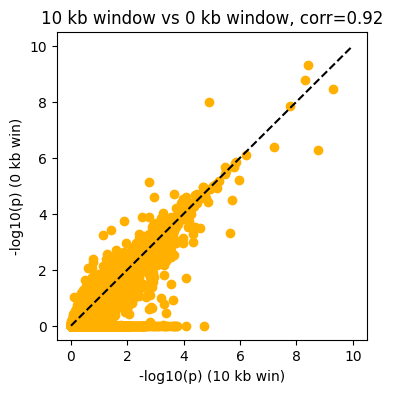

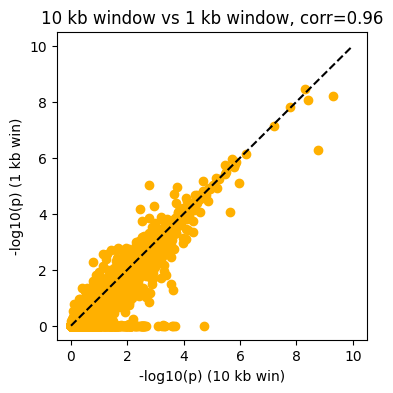

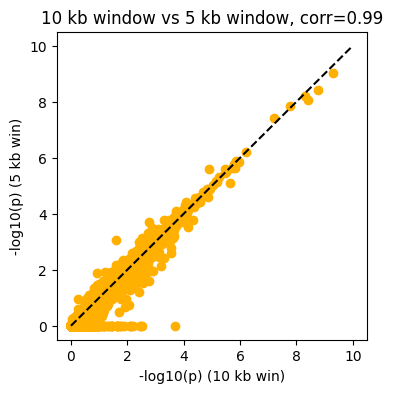

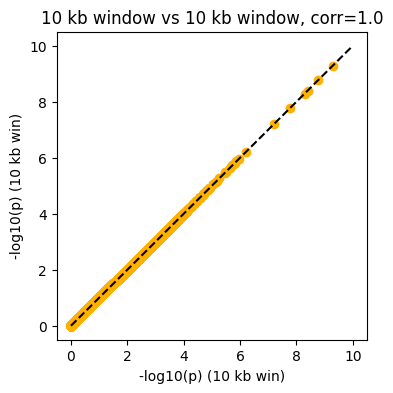

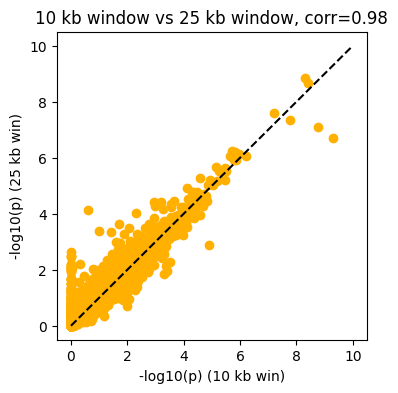

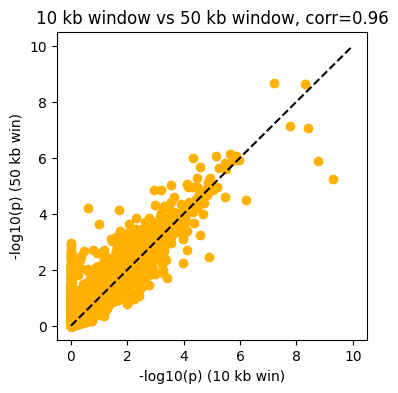

In [247]:

for w in [10]:
    for w2 in list(loco.keys()):
        t=loco[w][['GENE','P','ZSTAT']].merge(loco[w2][['GENE','P','ZSTAT']],on='GENE',how='outer').fillna(1)
        corr=corr_plt(t['P_x'],t['P_y'],'p')
        del(t)

### ZSTAT

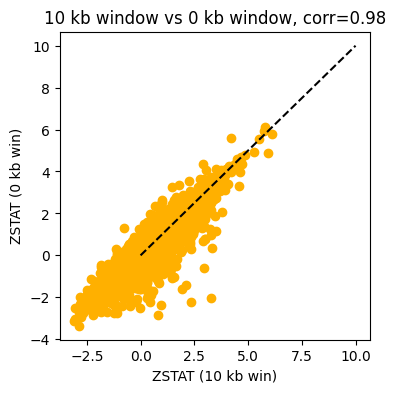

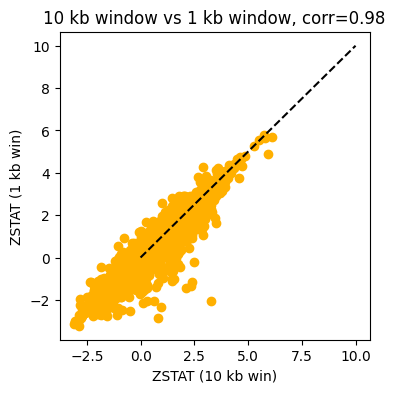

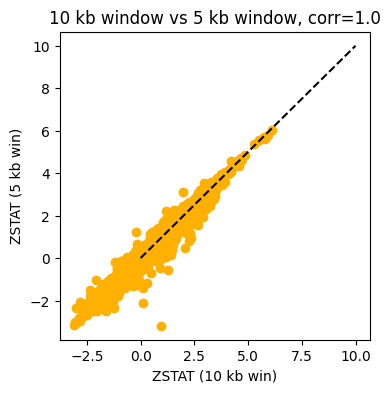

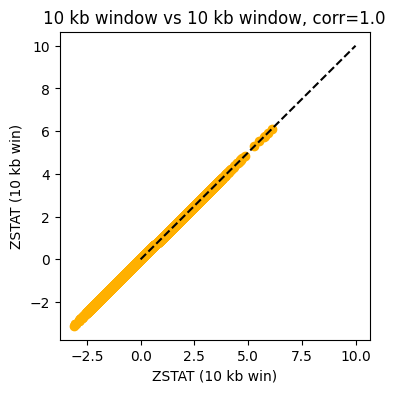

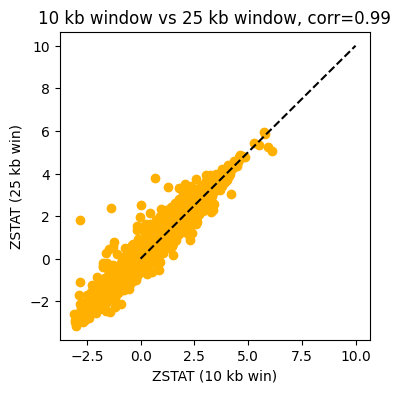

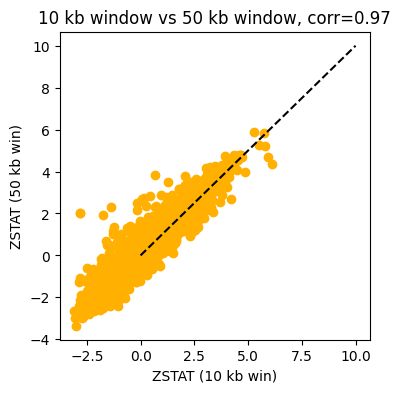

In [244]:
for w in list(loco.keys()):
    for w2 in list(loco.keys()):
        t=loco[w][['GENE','P','ZSTAT']].merge(loco[w2][['GENE','P','ZSTAT']],on='GENE',how='outer').dropna()
        corr_plt(t['ZSTAT_x'],t['ZSTAT_y'],'z')
        del(t)

## plot number of genes that are significantly associated

In [ ]:
t=loco[0][['GENE','P']].merge(
    loco[1][['GENE','P']],on='GENE',how='outer').merge(
    loco[5][['GENE','P']],on='GENE',how='outer').merge(
    loco[10][['GENE','P']],on='GENE',how='outer').merge(
    loco[25][['GENE','P']],on='GENE',how='outer').merge(
    loco[50][['GENE','P']],on='GENE',how='outer').fillna(1)
t.columns=['GENE']+list(loco.keys())

In [32]:
n_bonf=[]
n_fdr=[]
n_fdr1=[]
for k in list(loco.keys()):
    loco[k]['Q']=statsmodels.stats.multitest.fdrcorrection(loco[k]['P'],alpha=0.05,method='indep',is_sorted=False)[1]
    n_bonf.append(len(loco[k][loco[k]['P']<0.05/len(loco[k])]['GENE']))
    n_fdr.append(len(loco[k][loco[k]['Q']<0.05]))
    n_fdr1.append(len(loco[k][loco[k]['Q']<0.01]))

In [33]:
sig_genes = pd.DataFrame(
    {'window': list(loco.keys()),
     'n_bonf': n_bonf,
     'n_fdr': n_fdr,
     'n_fdr1': n_fdr1
    })

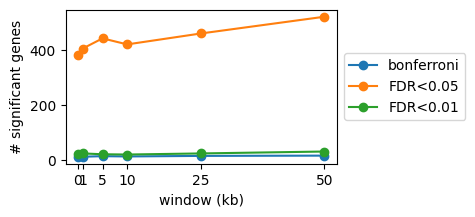

In [48]:
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(figsize=(3.5, 2))
ax.plot(sig_genes['window'], sig_genes['n_bonf'], marker='o', label='bonferroni')
ax.plot(sig_genes['window'], sig_genes['n_fdr'], marker='o', label='FDR<0.05')
ax.plot(sig_genes['window'], sig_genes['n_fdr1'], marker='o', label='FDR<0.01')
plt.xticks(sig_genes['window'])
ax.set_xlabel('window (kb)')
ax.set_ylabel('# significant genes')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
if save_fig:
    plt.savefig('figures/loco_magma_win_ngenes.svg',bbox_inches='tight')

In [ ]:
def NPS_lineplot(df,metric, filename, xrange=None, yrange=None, savefig=False, sigline=False):
    matplotlib.rcParams.update({'font.size': 8})
    df['-log10(p)']=-np.log10(df['empirical_p'])

    # Group data by NPS_single and plot each group separately
    groups = df.groupby('NPS_single')
    
    # Initialize a plot
    fig, ax = plt.subplots(figsize=(2.75, 2))
    
    # Plot lines for each NPS_single group
    for name, group in groups:
        ax.plot(group['NPS_common-rare'], group[metric], marker='o', label=f'NPS_single={name}')
    if sigline:
	    ax.axhline(y =-np.log10(0.05/len(df)), color = 'red', linestyle = 'dashed', linewidth=1)
    if ~(yrange is None):
        ax.set_ylim(yrange)
    if ~(xrange is None):
        ax.set_xlim(xrange)    
    # Set plot labels
    ax.set_xlabel('NPS combined') 
    ax.set_ylabel(metric.replace('_',' '))
    ax.legend(title='NPS single')
    ax.grid(True)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if savefig:
        plt.savefig('figures/'+filename,bbox_inches='tight')
    plt.show()


# Porcupine functions

In [ ]:
def porcupine(pval, test, pos, chr, label,
              cut_SKAT=5e-8,
              cut_SKATO=5e-8,
              cut_burden=5e-8,
              chrs_plot=None, chrs_names=None,
              cut=2,
              colors=['k', '0.5'],
              title='Title',
              xlabel='chromosome',
              ylabel='-log10(p-value)',
              top=0,
              lines=[10, 15],
              lines_colors=['g', 'r'],
              lines_styles=['-', '--'],
              lines_widths=[1, 1],
              zoom=None,
              scaling='-log10',
              plot_grid_lines=True,
              **kwargs):
    """
    Generates a specialized Porcupine plot for different types of rare-variant SNP to gene tests (SKAT, SKATO, Burden), highlighting significant findings in genomic data using color-coding for test types.

    Parameters:
    - pval (array-like): Array of p-values for genomic variants.
    - test (array-like): Array specifying the type of genetic test performed for each variant p-value.
    - pos (array-like): Array of positions of variants on their respective chromosomes.
    - chr (array-like): Array of chromosome numbers for each variant.
    - label (str): Label for the dataset, used for annotations.
    - cut_SKAT, cut_SKATO, cut_burden (float): Cutoff p-values for SKAT, SKATO, and Burden tests, respectively.
    - chrs_plot (list, optional): Specific chromosomes to include in the plot.
    - chrs_names (list, optional): Custom names for the chromosomes to be plotted.
    - cut (float): Cutoff for -log10(p-value) for displaying points on the plot.
    - colors (list): Colors to use for plotting points, cycling through for different chromosomes.
    - title (str): Title of the plot.
    - xlabel, ylabel (str): Labels for the x-axis and y-axis.
    - top (float): Upper limit for the y-axis; if 0, it is calculated from the data.
    - lines (list): y-values where horizontal lines should be drawn.
    - lines_colors, lines_styles, lines_widths (list): Properties for the horizontal lines.
    - zoom (tuple): Tuple (chromosome, center position, range) for focusing on a specific region.
    - scaling (str): P-value scaling method; supports '-log10' for negative log transformation or 'none'.
    - plot_grid_lines (bool): Whether to include grid lines on the plot.
    - **kwargs: Additional keyword arguments for matplotlib plot functions.

    Returns:
    matplotlib.pyplot: Configured plot object ready for display or saving.
    """
    
    # Initialize plot settings and clear any existing figures
    shift = np.array([0.0])
    plt.clf()

    # Determine which chromosomes to plot, sorting naturally if needed
    if chrs_plot is None:
        chrs_list = np.unique(chr)
        chrs_list = sorted_nicely(chrs_list) if isinstance(chrs_list[0], str) else chrs_list.sort()
    else:
        chrs_list = chrs_plot

    # Generate chromosome labels if not provided
    if chrs_names is None:
        chrs_names = [str(chrs_list[i]) for i in range(len(chrs_list))]

    plot_positions = len(chrs_list) == 1

    # Convert cutoffs to the appropriate scale if necessary
    if scaling == '-log10':
        cut_burden = -np.log10(cut_burden)
        cut_SKATO = -np.log10(cut_SKATO)
        cut_SKAT = -np.log10(cut_SKAT)
        
    # Plot data for each chromosome
    for ii, i in enumerate(chrs_list):     
        plt.subplot(1,1,1)
        filt = np.where(chr == i)[0]
        x = shift[-1] + pos[filt]
        y = -np.log10(pval[filt]) if scaling == '-log10' else pval[filt]
        test_filter = test[filt]
        
        # Plot data points above a general cut-off, with specific colors for each test type. Requires the color_dict to function, or must redefine the color dictionary
        plt.plot(x[y > cut], y[y > cut], '.', color=colors[ii % len(colors)], **kwargs)
        plt.plot(x[(y > cut) & (test_filter == 'Burden') & (y > cut_burden)], y[(y > cut) & (test_filter == 'Burden') & (y > cut_burden)], '.', color=color_dict['Burden'], **kwargs)
        plt.plot(x[(y > cut) & (test_filter == 'SKATO') & (y > cut_SKATO)], y[(y > cut) & (test_filter == 'SKATO') & (y > cut_SKATO)], '.', color=color_dict['SKAT-O'], **kwargs)
        plt.plot(x[(y > cut) & (test_filter == 'SKAT') & (y > cut_SKAT)], y[(y > cut) & (test_filter == 'SKAT') & (y > cut_SKAT)], '.', color=color_dict['SKAT'], **kwargs)

        # Calculate the maximum shift for the next set of points
        shift_f = np.max(x)
        shift_m = 0  # Placeholder for potential future use
        shift = np.append(shift, np.max([shift_f, shift_m]))

        # Set grid lines and limits
        if plot_grid_lines:
            plt.plot([shift[-1], shift[-1]], [0, 1000], '-', lw=0.5, color='lightgray', **kwargs)
        plt.xlim([0, shift[-1]])

    # Determine the upper limit for the y-axis
    if top == 0:
        top = np.ceil(np.max(-np.log10(pval))) if scaling == '-log10' else np.ceil(np.max(pval))

    # Configure fig labels and horizontal lines
    shift_label = shift[-1]
    shift = (shift[1:] + shift[:-1]) / 2
    for i, line_height in enumerate(lines):
        plt.axhline(y=line_height, color=lines_colors[i], linestyle=lines_styles[i], linewidth=lines_widths[i])
    
    plt.ylim([cut, top])
    plt.title(title)
    if not plot_positions:
        plt.xticks(shift, chrs_names)
    plt.text(shift_label * 0.95, top * 0.95, label, verticalalignment='top', horizontalalignment='right')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    # Apply zoom settings if specified
    if zoom is not None:
        plt.xlim([zoom_shift - zoom[2], zoom_shift + zoom[2]])

    return plt

In [ ]:
def porcupineplot(self, qtltable: pd.DataFrame(), traitlist: list = [], run_only_qtls = True,
                save_fmt: list = ['html', 'png'], display: bool = True,
                  low_mem = False, childlock = True, qtl_annotation: bool = True, nosmallp: bool = True):
    printwithlog(f'starting porcupineplot ... {self.project_name} reading files')
    samplen = int(1e5) if low_mem else int(5e5) 
    rangen = range(160,180) if low_mem else range(80,90)
    maxtraits = 10
    if len(traitlist) == 0: 
        if run_only_qtls: traitlist = list(qtltable.trait.unique())
        else: traitlist = self.traits
    traitlist = [x.replace("regressedlr_", "") for x in traitlist]
    qtl = qtltable.query('QTL==True')
    df_gwas,df_date = [], []
    for trait_pos, t in tqdm(list(enumerate(traitlist))):
        if childlock == True: childlock_val = np.inf if trait_pos < maxtraits else 0
        for opt in [f'regressedlr_{t.replace("regressedlr_", "")}.loco.mlma', 
                    f'regressedlr_{t.replace("regressedlr_", "")}.mlma']+ \
        [f'regressedlr_{t.replace("regressedlr_", "")}_chrgwas{chromp2}.mlma' for chromp2 in self.chrList()]:
            if glob(f'{self.path}results/gwas/{opt}'): 
                samplenuse = samplen//20 if '_chrgwas' in opt else samplen
                g = pd.read_csv(f'{self.path}results/gwas/{opt}', sep = '\t', dtype = {'Chr': int, 'bp': int}).assign(trait = t)
                g['p'] = g['p'].fillna(1)
                #g=g.applymap(np.nan_to_num)
                g['inv_prob'] = 1/(np.clip(g.p, 1e-6, 1)) 
                if not nosmallp:
                    if  g.query('p > 0.05').shape[0] > 0:
                        gweighted = [g.query('p > 0.05').sample(min(samplenuse, g.query('p > 0.05').shape[0], childlock_val), weights='inv_prob')]
                    else: gweighted = []
                    gweighted += [g[::np.random.choice(rangen)].sample(frac = (trait_pos< maxtraits))]
                else: gweighted =[]
                g = pd.concat([g.query('p < 0.05')]+ gweighted )\
                .sort_values(['Chr', 'bp']).reset_index(drop = True).dropna()
                df_gwas += [g]
                if sum(map(len, df_gwas)) > 1e6: maxtraits = 0
            else: pass
    df_gwas = pd.concat(df_gwas).sort_values(['Chr', 'bp']).reset_index(drop = True)
    
    append_position = df_gwas.groupby('Chr').bp.agg('max').sort_index().cumsum().shift(1,fill_value=0)
    df_gwas['Chromosome'] = df_gwas.apply(lambda row: row.bp + append_position[row.Chr], axis = 1)
    cmap = sns.color_palette("tab10", len(traitlist))
    d = {t: cmap[v] for v,t in enumerate(sorted(traitlist))}
    tnum = {t:num for num,t in enumerate(sorted(traitlist))}
    def mapcolor(c, thresh, p, trait):
        if -np.log10(p)> thresh : return d[trait] 
        elif int(str(c).replace('X',str(self.n_autosome+1)).replace('Y', str(self.n_autosome+2)).replace('MT', str(self.n_autosome+4)))%2 == 0: return 'black'
        return 'gray'
    
    printwithlog(f'starting porcupineplot ... {self.project_name} colorcoding')
    df_gwas['color']= df_gwas.progress_apply(lambda row: mapcolor(row.Chr, self.threshold, row.p, row.trait) ,axis =1)
    df_gwas['annotate'] = (df_gwas.SNP + df_gwas.trait.str.replace('regressedlr_', '') ) .isin(qtl.reset_index().SNP+qtl.reset_index().trait.str.replace('regressedlr_', ''))
    df_gwas.trait = df_gwas.trait.str.replace('regressedlr_', '')
    df_gwas['log10p'] = -np.log10(df_gwas['p'])
    
    fig2 =  go.Figure(data=[])
    fig2.add_scattergl(x = df_gwas['Chromosome'].values,y = -np.log10(df_gwas['p']), name = '', 
                       mode='markers', marker=dict(color=df_gwas.color,line_width=0), showlegend = False)
    for name, ite in tqdm(df_gwas.query('annotate').sort_values('trait').groupby('trait')):
        fig2.add_scattergl(x = ite.Chromosome,y = -np.log10(ite.p),mode='markers',name = f"{name} ({tnum[name]+1})",
                       marker=dict( line_width=1, size = 15, color ='rgb({},{},{})'.format(*ite.color.iloc[0]) ),
                       marker_symbol = 'star-diamond-dot')
    for x in append_position.values: fig2.add_vline(x=x, line_width=1, line_dash="dash", line_color="gray")
    fig2.add_hline(y=self.threshold, line_width=2,  line_color="red")
    fig2.add_hline(y=self.threshold05, line_width=2, line_color="blue")
    if qtl_annotation: 
        showlegend = True
        df_gwas.query('annotate')\
               .apply(lambda x: fig2.add_annotation(x=x.Chromosome, y=-np.log10(x.p),
                                                    text=f"({tnum[x.trait]+1})",showarrow=True,arrowhead=2), axis = 1)
    else:showlegend = True
    if nosmallp:
        # printwithlog('adding lines to porcupineplot')
        temp = df_gwas.query('log10p < 2')
        def add_loli(row):
            return  dict(type = 'line', x0 = row.Chromosome, x1 = row.Chromosome, y0 = 0, y1 =1.32 , line = {'color': row.color, "width": 7, 'dash': 'solid'})
        temp['shapes'] = temp.progress_apply(add_loli, axis = 1)
        temp = temp.assign(rounded = temp.bp.round(-4)).groupby(['Chr', 'rounded']).progress_apply(lambda x: x.nsmallest(1, 'Chromosome'))
        fig2.update_layout(shapes = temp.shapes.to_list())
    printwithlog(f'starting porcupineplot ... {self.project_name} making figure')
    fig2.update_layout(yaxis_range=[0,max(6, -np.log10(df_gwas.p.min())+.5)],
                       xaxis_range = df_gwas.Chromosome.agg(['min', 'max']),
                       template='simple_white',width = 1920, height = 800,  
                       showlegend=showlegend , xaxis_title="Chromosome", yaxis_title="-log10(p)")
    dfgwasgrouped = df_gwas.groupby('Chr')
    fig2.update_xaxes(ticktext = [self.replacenumstoXYMT(names) for names,dfs in dfgwasgrouped],
              tickvals =(append_position + dfgwasgrouped.bp.agg('max').sort_index().cumsum())//2 )
    printwithlog(f'starting porcupineplot ... {self.project_name} saving figure')
    if 'png' in save_fmt: fig2.write_image(f"{self.path}images/porcupineplot.png",width = 1920, height = 800)
    if display: fig2.show(renderer = 'png',width = 1920, height = 800)
    return fig2, df_gwas

def porcupineplotv2(self, qtltable = '', traitlist: list = [], display_figure = False, skip_manhattan = False, maxtraits = 60):
    printwithlog('starting porcupine plot v2')
    hv.opts.defaults(hv.opts.Points(width=1200, height=600), hv.opts.RGB(width=1200, height=600) )
    if type(qtltable) == str:
        if not len(qtltable): qtltable = pd.read_csv(f'{self.path}results/qtls/finalqtl.csv').reset_index().query('QTL == True')
    if not len(traitlist): traitlist = list(map(lambda x:x.replace('regressedlr_', ''),self.traits))        
    cmap = sns.color_palette("tab20", len(traitlist))
    d = {t: cmap[v] for v,t in enumerate(sorted(traitlist))}
    d_inv = {cmap[v]:t for v,t in enumerate(sorted(traitlist))}
    tnum = {t:num for num,t in enumerate(sorted(traitlist))}    
    qtltable['color'] =  qtltable.trait.apply(lambda x: d[x]) 
    qtltable['traitnum'] =  qtltable.trait.apply(lambda x: f'{tnum[x]}') 
    if len(traitlist) > maxtraits: 
        traitlist_new = list(qtltable.trait.unique())
        if maxtraits - len(traitlist_new) > 0:
            traitlist_new += list(np.random.choice(list(set(traitlist) - set(traitlist_new)), maxtraits - len(traitlist_new), replace = False))
    else: traitlist_new = traitlist
    fdf = []
    h2file = pd.read_csv(f'{self.path}results/heritability/heritability.tsv', sep = '\t', index_col = 0).rename(lambda x: x.replace('regressedlr_', ''))
    for num, t in tqdm(list(enumerate(traitlist))):
        if not skip_manhattan or t in traitlist_new:
            df_gwas = []
            for opt in [f'regressedlr_{t.replace("regressedlr_", "")}.loco.mlma', 
                        f'regressedlr_{t.replace("regressedlr_", "")}.mlma']+ \
                       [f'regressedlr_{t.replace("regressedlr_", "")}_chrgwas{chromp2}.mlma' for chromp2 in self.chrList()]:
                if glob(f'{self.path}results/gwas/{opt}'):
                    df_gwas += [pd.read_csv(f'{self.path}results/gwas/{opt}', sep = '\t')]
                else:  pass
            if len(df_gwas) == 0 :  printwithlog(f'could not open mlma files for {t}')
            df_gwas = pd.concat(df_gwas)
            append_position = df_gwas.groupby('Chr').bp.agg('max').sort_index().cumsum().shift(1,fill_value=0)
            qtltable['x'] = qtltable.apply(lambda x: x.bp +  append_position[x.Chr], axis = 1)
            df_gwas['-log10p'] = -np.log10(df_gwas.p)
            df_gwas.drop(['A1', 'A2', 'Freq', 'b', 'se', 'p'], axis = 1, inplace = True)
            def mapcolor(c): 
                if int(str(c).replace('X',str(self.n_autosome+1)).replace('Y', str(self.n_autosome+2)).replace('MT', str(self.n_autosome+4)))%2 == 0: return 'black'
                return 'gray'
            df_gwas = df_gwas.groupby('Chr') \
                             .apply(lambda df: df.assign(color = mapcolor(df.Chr[0]), x = df.bp + append_position[df.Chr[0]])) \
                             .reset_index(drop = True)
            df_gwas.loc[df_gwas['-log10p']> self.threshold, 'color' ] = str(d[t])[1:-1]
            df_gwas.loc[df_gwas['-log10p']> self.threshold, 'color' ] = df_gwas.loc[df_gwas['-log10p']> self.threshold, 'color' ].str.split(',').map(lambda x: tuple(map(float, x)))
            if not skip_manhattan:
                yrange = (-.05,max(6, df_gwas['-log10p'].max()+.5))
                xrange = tuple(df_gwas.x.agg(['min', 'max'])+ np.array([-1e7,+1e7]))
                fig = []
                for idx, dfs in df_gwas[df_gwas.color.isin(['gray', 'black'])].groupby('color'):
                    temp = datashade(hv.Points(dfs, kdims = ['x','-log10p']), pixel_ratio= 2, aggregator=ds.count(), width = 1200,height = 600, y_range= yrange,
                             min_alpha=.7, cmap = [idx], dynamic = False )
                    temp = dynspread(temp, max_px=4,threshold= 1 )
                    fig += [temp]
                fig = fig[0]*fig[1]
                fig = fig*hv.HLine((self.threshold05)).opts(color='blue')*hv.HLine(self.threshold).opts(color='red')
                fig = fig*hv.Points(df_gwas[df_gwas['-log10p']> self.threshold].drop('color', axis = 1), 
                                    kdims = ['x','-log10p']).opts(color = 'red', size = 5)
                figh2 = round(h2file.loc[t.replace("regressedlr_", ""),'V(G)/Vp'],3)
                fig = fig.opts(xticks=[((dfs.x.agg(['min', 'max'])).sum()//2 , self.replacenumstoXYMT(names)) for names,dfs in  df_gwas.groupby('Chr')],
                                               xlim =xrange, ylim=yrange, width = 1200,height = 600,  xlabel='Chromosome',
                               title = f'{t.replace("regressedlr_", "")} n={self.df["regressedlr_"+ t.replace("regressedlr_", "")].count()} h2={figh2}') 
                hv.save(fig, f'{self.path}images/manhattan/{t.replace("regressedlr_", "")}.png')
            if t in traitlist_new: fdf += [df_gwas]
    fdf = pd.concat(fdf).reset_index(drop = True).sort_values('x')
    fig = []
    yrange = (-.05,max(6, fdf['-log10p'].max()+.5))
    xrange = tuple(fdf.x.agg(['min', 'max'])+ np.array([-1e7,+1e7]))
    for idx, dfs in fdf[fdf.color.isin(['gray', 'black'])].groupby('color'):
        temp = datashade(hv.Points(dfs, kdims = ['x','-log10p']), pixel_ratio= 2, aggregator=ds.count(), width = 1200,height = 600, y_range= yrange,
                 min_alpha=.7, cmap = [idx], dynamic = False )
        temp = dynspread(temp, max_px=4,threshold= 1 )
        fig += [temp]
    fig = fig[0]*fig[1]
    
    fig = fig*hv.HLine((self.threshold05)).opts(color='blue')
    fig = fig*hv.HLine(self.threshold).opts(color='red')
    
    for idx, dfs in fdf[~fdf.color.isin(['gray', 'black'])].groupby('color'):
        fig = fig*hv.Points(dfs.drop('color', axis = 1), kdims = ['x','-log10p']).opts(color = idx, size = 5)
    
    for t, dfs in qtltable.groupby('trait'):
        fig = fig*hv.Points(dfs.assign(**{'-log10p': qtltable.p}), kdims = ['x','-log10p'],vdims=[ 'trait','SNP' ,'A1','A2','Freq' ,'b','traitnum'], label = f'({tnum[t]}) {t}' ) \
                                      .opts(size = 17, color = d[t], marker='inverted_triangle', line_color = 'black', tools=['hover']) #
    fig = fig*hv.Labels(qtltable.rename({'p':'-log10p'}, axis = 1)[['x', '-log10p', 'traitnum']], 
                        ['x','-log10p'],vdims=['traitnum']).opts(text_font_size='5pt', text_color='black')
    fig.opts(xticks=[((dfs.x.agg(['min', 'max'])).sum()//2 , self.replacenumstoXYMT(names)) for names, dfs in fdf.groupby('Chr')],
                               xlim =xrange, ylim=yrange, xlabel='Chromosome', shared_axes=False,
                           width=1200, height=600, title = f'porcupineplot',legend_position='right',show_legend=True)
    hv.save(fig, f'{self.path}images/porcupineplot.png')
    if display_figure: 
        display(fig)
        return
    return fig
